## **Prediction Using Supervised Machine Learning**

BY: ANISHKA BHATIA


In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
#Importing Dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Getting to know the data types and rows of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
#Getting more detailed insights of our dataset and information like mean, median, std etc.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing Data


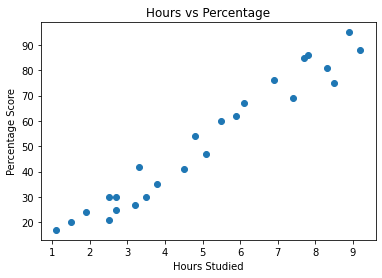

In [5]:
#plotting distribution of scores
plt.scatter(x='Hours', y='Scores', data = data)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

We can clearly see a positive linear relationship between the percentages and number of hours studied, i.e., the greater number of hours you spend studying, the greater are your sores.

### **Preparing the data**

In [6]:
#diving the data into columns and labels
X = data.iloc[:,:-1].values
y = data.iloc[:, 1].values  

In [7]:
#Dividing the data into train and test sets using Scikit Learns built in train_test_split method

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now we train our algorithm. 

In [8]:
from sklearn.linear_model import LinearRegression  
regression = LinearRegression()  
regression.fit(x_train, y_train) 

print("Training complete.")

Training complete.


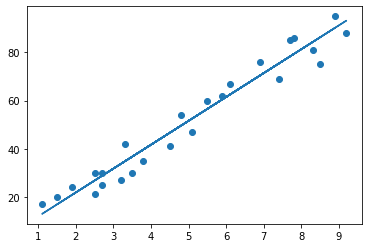

In [9]:
# Plotting the regression line
line = regression.coef_*X+regression.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**

In [10]:
print(x_test) # Testing data - In Hours
y_pred = regression.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Accuracy of the model

In [12]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9454906892105355

94% Accuracy means that the above model is a 'GOOD MODEL'


In [20]:
#Predicting the score of person if they study for 9.5 hours
hours = 9.25
pred_score = regression.predict([[hours]])
print("No of Hours = ", hours)
print("Predicted Score = ", pred_score[0])

No of Hours =  9.25
Predicted Score =  93.69173248737538


### **Predicting the Error**

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.18385989900298


### **To conclude,  A person who studies for 9.25 hours/day will get a score of 93.7% approximateley**